In [1]:
import numpy as np
import matplotlib.pyplot as plt

from CyRK import __version__, cyrk_ode, nbrk_ode

from performance import diffeqs
del diffeqs['Lorenz-ExtraOut']

## CyRK - cyrk_ode

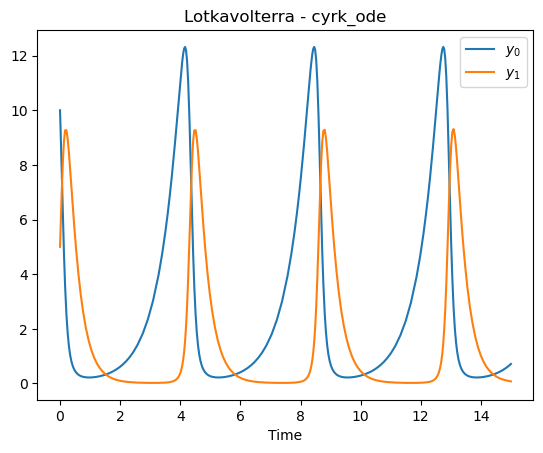

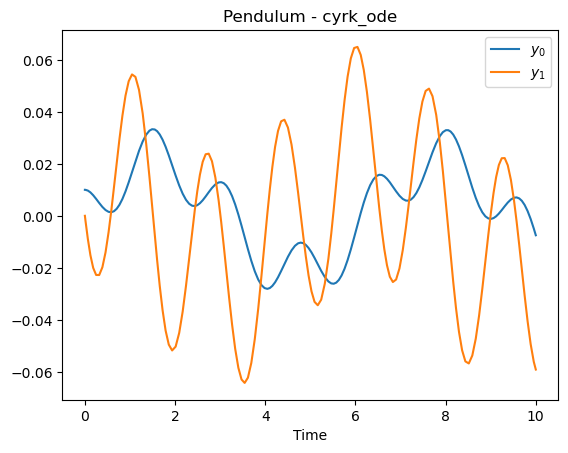

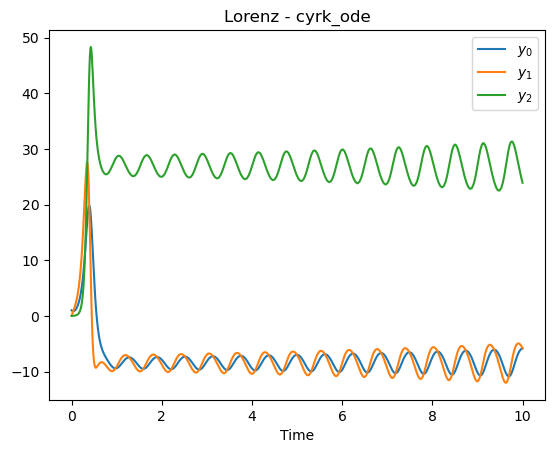

In [2]:
for diffeq_name, (cy_diffeq, nb_diffeq, args_, y0, timespans, CySolverClass) in diffeqs.items():
            
    time_span = timespans[0]
    time_domain, y_results, success, message = cyrk_ode(cy_diffeq, time_span, y0, args_, rk_method=1)
    y_len = y_results.shape[0]
        
    
    fig, ax = plt.subplots()
    for i in range(y_len):
        ax.plot(time_domain, np.real(y_results[i, :]), label=f'$y_{i}$')
    ax.set(title=f'{diffeq_name} - cyrk_ode', xlabel='Time')
    ax.legend(loc='best')
    

## CyRK - CySolver

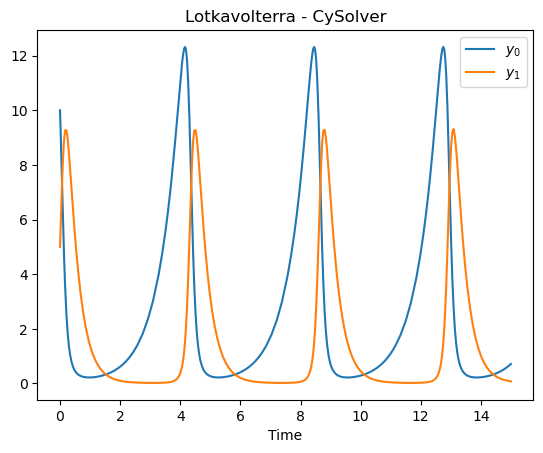

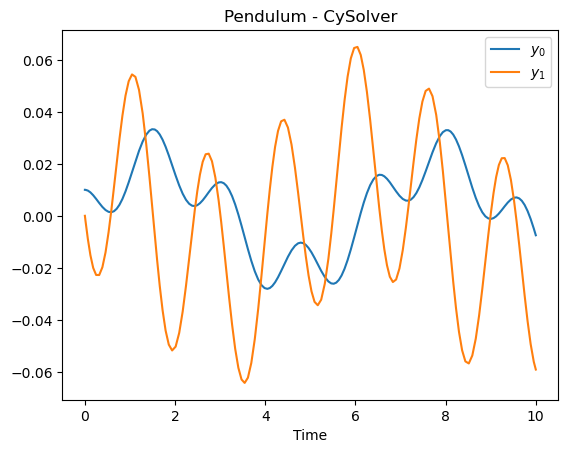

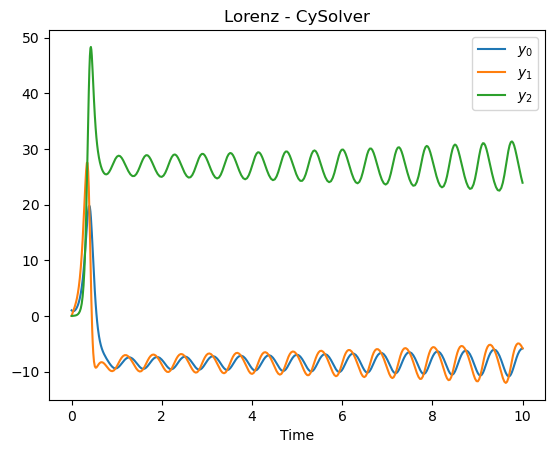

In [3]:
for diffeq_name, (cy_diffeq, nb_diffeq, args_, y0, timespans, CySolverClass) in diffeqs.items():
            
    time_span = timespans[0]
    CySolverInst = CySolverClass(time_span, y0, args_, rk_method=1)
    CySolverInst.solve()
    y_len = CySolverInst.solution_y.shape[0]
        
    
    fig, ax = plt.subplots()
    for i in range(y_len):
        ax.plot(CySolverInst.solution_t, np.real(CySolverInst.solution_y[i, :]), label=f'$y_{i}$')
    ax.set(title=f'{diffeq_name} - CySolver', xlabel='Time')
    ax.legend(loc='best')

## CyRK - nbrk_ode

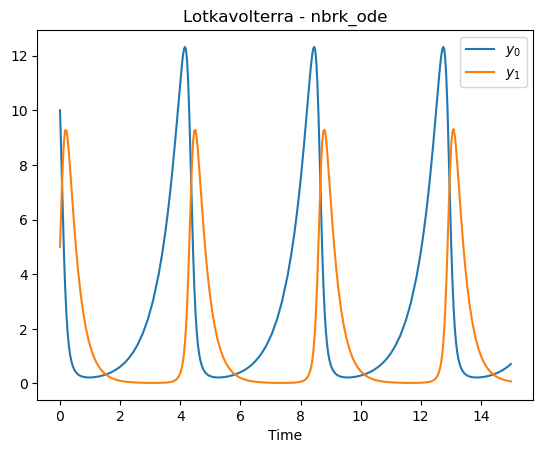

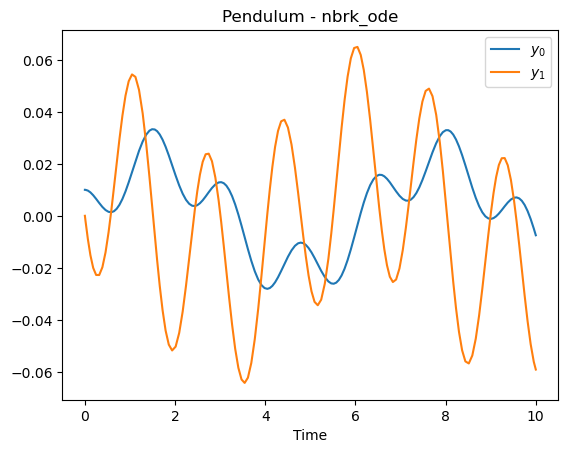

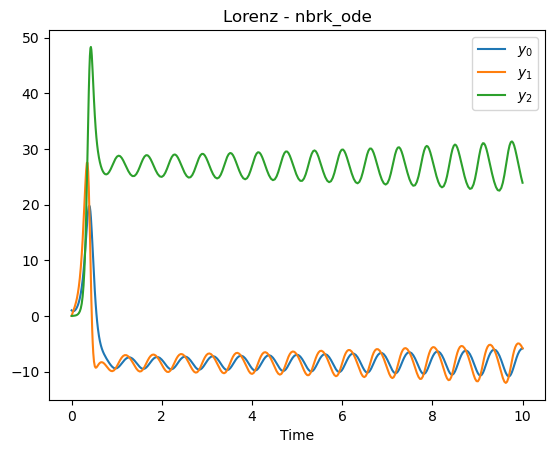

In [4]:
for diffeq_name, (cy_diffeq, nb_diffeq, args_, y0, timespans, CySolverClass) in diffeqs.items():
    
    time_span = timespans[0]
    time_domain, y_results, success, message = nbrk_ode(nb_diffeq, time_span, y0, args_, rk_method=1)
    y_len = y_results.shape[0]
    
    fig, ax = plt.subplots()
    for i in range(y_len):
        ax.plot(time_domain, np.real(y_results[i, :]), label=f'$y_{i}$')
    ax.set(title=f'{diffeq_name} - nbrk_ode', xlabel='Time')
    ax.legend(loc='best')